<h2 style='color:blue' align='center'>Sports Celebrity Image Classification: Data Cleaning<h2>

Special thanks to Debjyoti Paul (My data scientist friend at Amazon) for help with this project

In [58]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

#### When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.</h4>

#### Now how do you detect face and eyes?

In [93]:
from skimage import io

img = io.imread('./test_images/janakan2.jpg')
img.shape

(3024, 4032, 3)

In [94]:
img = cv2.imread('./test_images/janakan2.jpg')


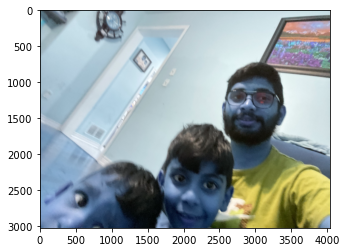

In [95]:
plt.imshow(img)

In [96]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(3024, 4032)

In [97]:
gray

array([[112, 112, 113, ..., 215, 215, 215],
       [116, 116, 115, ..., 215, 215, 215],
       [117, 116, 115, ..., 215, 215, 215],
       ...,
       [110, 119, 116, ..., 174, 175, 175],
       [118, 117, 110, ..., 171, 172, 173],
       [127, 117, 106, ..., 171, 172, 173]], dtype=uint8)

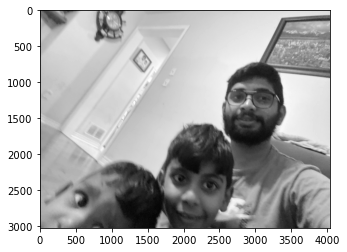

In [98]:
plt.imshow(gray, cmap='gray')

In [99]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[2492,  879,  836,  836]], dtype=int32)

In [100]:
(x,y,w,h) = faces[0]
x,y,w,h

(2492, 879, 836, 836)

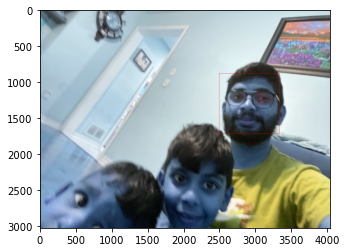

In [101]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

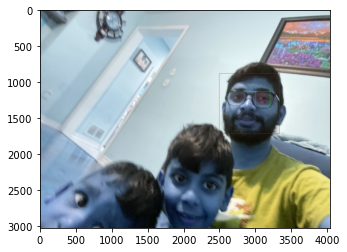

In [102]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

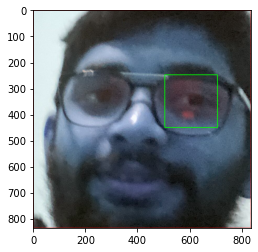

In [103]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [104]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
        
# need to change the method to return both crop image if the image has 2 person in it

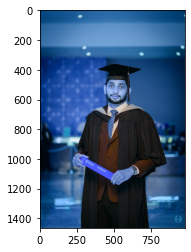

In [105]:
original_image = cv2.imread('./test_images/janakan.jpg')
plt.imshow(original_image)

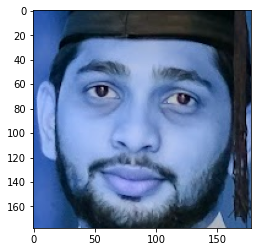

In [106]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/janakan.jpg')
plt.imshow(cropped_image)

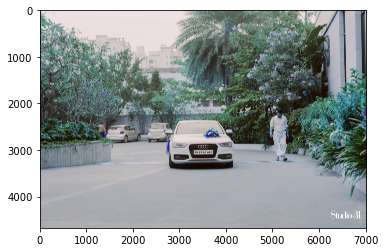

In [107]:
org_image_obstructed = cv2.imread('./test_images/janakan1.jpg')
plt.imshow(org_image_obstructed)

In [108]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/janakan1.jpg')
cropped_image_no_2_eyes

In [115]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [116]:
# find all the path to a certain image folders
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [117]:
img_dirs

['./dataset/Janakan_siva',
 './dataset/Shreya',
 './dataset/Neema',
 './dataset/lionel_messi',
 './dataset/Aravinda',
 './dataset/.ipynb_checkpoints']

In [118]:
del img_dirs[-1]

In [119]:
#if path to crop folder exist it removes the folder and recreate a folder
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [121]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        
        try:
            roi_color = get_cropped_image_if_2_eyes(entry.path)
        except:
            print("This image hase issue",entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1   

Generating cropped images in folder:  ./dataset/cropped/Janakan_siva
This image hase issue ./dataset/Janakan_siva/.DS_Store
This image hase issue ./dataset/Janakan_siva/jankan73.jpg
This image hase issue ./dataset/Janakan_siva/jankan74.jpg
This image hase issue ./dataset/Janakan_siva/jankan75.jpg
This image hase issue ./dataset/Janakan_siva/jankan77.jpg
This image hase issue ./dataset/Janakan_siva/jankan76.jpg
This image hase issue ./dataset/Janakan_siva/jankan24.jpg
This image hase issue ./dataset/Janakan_siva/jankan44.HEIC
This image hase issue ./dataset/Janakan_siva/jankan19.jpg
This image hase issue ./dataset/Janakan_siva/jankan25.jpg
This image hase issue ./dataset/Janakan_siva/jankan22.jpg
This image hase issue ./dataset/Janakan_siva/jankan23.jpg
This image hase issue ./dataset/Janakan_siva/jankan21.jpg
This image hase issue ./dataset/Janakan_siva/jankan20.jpg
Generating cropped images in folder:  ./dataset/cropped/Shreya
Generating cropped images in folder:  ./dataset/cropped/Ne